In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = '/content/Telco-Customer.csv'

In [ ]:
 df = pd.read_csv(file_path)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7040 non-null   float64
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Synthetic Data Generation

In [ ]:
import numpy as np

# Ensure consistent seed for synthetic data generation
np.random.seed(42)

# Add e-commerce-specific attributes
df['WebsiteClickRate'] = np.random.uniform(0.5, 10, len(df)).round(2)
df['TimeSpentOnSite'] = np.random.uniform(5, 300, len(df)).round(2)
df['SocialMediaEngagement'] = np.random.randint(0, 100, len(df))
df['AdClickHistory'] = np.random.uniform(0, 1, len(df)).round(2)
df['CustomerSentimentScore'] = np.random.uniform(-1, 1, len(df)).round(2)
df['FavoriteCategory'] = np.random.choice(
    ["Billing and Payments", "Streaming Services", "Contract Upgrades", "Entertainment Add-Ons", "Others"],
    len(df)
)



# Sanity Check

In [ ]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'WebsiteClickRate', 'TimeSpentOnSite', 'SocialMediaEngagement',
       'AdClickHistory', 'CustomerSentimentScore', 'FavoriteCategory'],
      dtype='object')


In [ ]:
# Check unique values in categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
unique_values = {col: df[col].unique() for col in categorical_columns}

for col, values in unique_values.items():
    print(f"{col}: {values}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']
FavoriteCategory: ['Entertainment Add-Ons' 'Contract Upgrades' 'Others'
 'Billing and Payments' 'Streaming Services']


In [ ]:
#finding duplicates
df.duplicated().sum()

0

In [ ]:
# Check for missing values
missing_summary = df.isnull().sum()
print(missing_summary)

# Calculate the percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


customerID                0
gender                    0
SeniorCitizen             0
Partner                   0
Dependents                0
tenure                    3
PhoneService              0
MultipleLines             0
InternetService           0
OnlineSecurity            0
OnlineBackup              0
DeviceProtection          0
TechSupport               0
StreamingTV               0
StreamingMovies           0
Contract                  0
PaperlessBilling          0
PaymentMethod             0
MonthlyCharges            0
TotalCharges              0
Churn                     0
WebsiteClickRate          0
TimeSpentOnSite           0
SocialMediaEngagement     0
AdClickHistory            0
CustomerSentimentScore    0
FavoriteCategory          0
dtype: int64
customerID                0.000000
gender                    0.000000
SeniorCitizen             0.000000
Partner                   0.000000
Dependents                0.000000
tenure                    0.042595
PhoneService         

Missing Values in tenure: Only 3 rows are affected (<0.05%); these can be safely dropped.

In [ ]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,CustomerSentimentScore,FavoriteCategory
count,7043,7043,7043.000000,7043,7043,7040.000000,7043,7043,7043,7043,...,7043,7043.000000,7043,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,4,NaN,6531,2,NaN,NaN,NaN,NaN,NaN,5
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,Electronic check,NaN,,No,NaN,NaN,NaN,NaN,NaN,Streaming Services
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,2365,NaN,11,5174,NaN,NaN,NaN,NaN,NaN,1494
mean,NaN,NaN,0.162147,NaN,NaN,32.378693,NaN,NaN,NaN,NaN,...,NaN,64.761692,NaN,NaN,5.216507,151.126377,49.758626,0.501203,0.007724,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.561205,NaN,NaN,NaN,NaN,...,NaN,30.090047,NaN,NaN,2.749496,84.955722,29.070661,0.289793,0.574784,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,18.250000,NaN,NaN,0.500000,5.020000,0.000000,0.000000,-1.000000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,35.500000,NaN,NaN,2.820000,77.710000,24.000000,0.250000,-0.480000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,70.350000,NaN,NaN,5.210000,149.680000,50.000000,0.500000,0.020000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,89.850000,NaN,NaN,7.610000,224.860000,75.000000,0.750000,0.500000,NaN


#Data Cleaning

In [ ]:
# Dropping rows with missing values in the 'tenure' column
df = df.dropna(subset=['tenure'])

# Verify the changes
print(f"Shape of the dataset after dropping missing values: {df.shape}")


Shape of the dataset after dropping missing values: (7040, 27)


In [ ]:


# Convert 'TotalCharges' to numeric, coercing errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with NaN values in 'TotalCharges'
df.dropna(subset=['TotalCharges'], inplace=True)

print(f"Shape of the dataset after dropping missing values: {df.shape}")

Shape of the dataset after dropping missing values: (7029, 27)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7029 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7029 non-null   object 
 1   gender                  7029 non-null   object 
 2   SeniorCitizen           7029 non-null   int64  
 3   Partner                 7029 non-null   object 
 4   Dependents              7029 non-null   object 
 5   tenure                  7029 non-null   float64
 6   PhoneService            7029 non-null   object 
 7   MultipleLines           7029 non-null   object 
 8   InternetService         7029 non-null   object 
 9   OnlineSecurity          7029 non-null   object 
 10  OnlineBackup            7029 non-null   object 
 11  DeviceProtection        7029 non-null   object 
 12  TechSupport             7029 non-null   object 
 13  StreamingTV             7029 non-null   object 
 14  StreamingMovies         7029 non-null   objec

In [ ]:
# Rename the specified columns
df.rename(columns={
    'tenure': 'TenureMonths',
    'gender': 'Gender',

}, inplace=True)

In [ ]:
df.drop(columns = ['customerID'], inplace = True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Create a copy of the df
df1 = df.copy(deep=True)

# Identify object-type columns (categorical features) for label encoding
categorical_features = [col for col in df1.columns if df1[col].dtype == 'object']

# Apply LabelEncoder to categorical features
print('Label Encoder Transformation')
for col in categorical_features:
    df1[col] = le.fit_transform(df1[col])
    print(col, ' : ', df1[col].unique(), ' = ', le.inverse_transform(df1[col].unique()))


Label Encoder Transformation
Gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']
FavoriteCategory  :  [2 1 3 0 4]  =  ['En

In [ ]:
df1.describe()

,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaymentMethod,MonthlyCharges,TotalCharges,Churn,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,CustomerSentimentScore,FavoriteCategory
count,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,...,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000,7029.000000
mean,0.504624,0.162470,0.482714,0.298478,32.429364,0.903258,0.940959,0.872813,0.789301,0.905961,...,1.572770,64.794644,2283.723510,0.265756,5.220003,151.141067,49.760848,0.501172,0.007584,2.041827
std,0.500014,0.368907,0.499737,0.457623,24.546966,0.295627,0.948631,0.737280,0.859921,0.880352,...,1.067448,30.087906,2267.055535,0.441766,2.748846,84.936569,29.078508,0.289758,0.574964,1.416913
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,18.250000,18.800000,0.000000,0.500000,5.020000,0.000000,0.000000,-1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,35.550000,401.500000,0.000000,2.830000,77.710000,24.000000,0.250000,-0.480000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,70.350000,1397.650000,0.000000,5.220000,149.680000,50.000000,0.500000,0.020000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,...,2.000000,89.850000,3795.450000,1.000000,7.610000,224.910000,75.000000,0.750000,0.500000,3.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,118.750000,8684.800000,1.000000,10.000000,299.900000,99.000000,1.000000,1.000000,4.000000


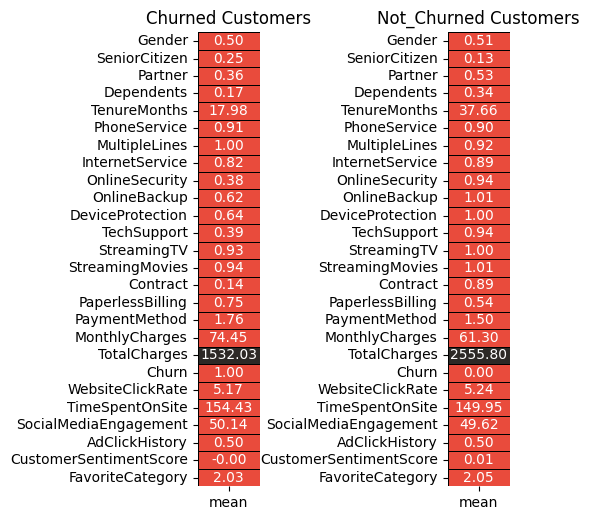

In [ ]:
colors = ['#E94B3C','#2D2926']

churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');

fig.tight_layout(pad = 0)

# Feature Engineering

In [ ]:
print(df1.columns)

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'WebsiteClickRate',
       'TimeSpentOnSite', 'SocialMediaEngagement', 'AdClickHistory',
       'CustomerSentimentScore', 'FavoriteCategory'],
      dtype='object')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7029 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  7029 non-null   int64  
 1   SeniorCitizen           7029 non-null   int64  
 2   Partner                 7029 non-null   int64  
 3   Dependents              7029 non-null   int64  
 4   TenureMonths            7029 non-null   float64
 5   PhoneService            7029 non-null   int64  
 6   MultipleLines           7029 non-null   int64  
 7   InternetService         7029 non-null   int64  
 8   OnlineSecurity          7029 non-null   int64  
 9   OnlineBackup            7029 non-null   int64  
 10  DeviceProtection        7029 non-null   int64  
 11  TechSupport             7029 non-null   int64  
 12  StreamingTV             7029 non-null   int64  
 13  StreamingMovies         7029 non-null   int64  
 14  Contract                7029 non-null   int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 1. Calculate Recency (reverse of TenureMonths for RFM)
df['Recency'] = df['TenureMonths'].max() - df['TenureMonths']

# 2. Estimate Frequency (use EngagementLevel as proxy for interaction frequency)
# Count the number of services used (excluding "No" and "No internet service")
service_columns = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

df['Frequency'] = df[service_columns].apply(
    lambda x: sum([1 for val in x if val not in ['No', 'No internet service']]), axis=1
)

# 3. Monetary (TotalCharges is used as is for monetary value)
df['Monetary'] = df['TotalCharges']

# 4. Normalize numeric variables
scaler = MinMaxScaler()
columns_to_scale = ['Recency', 'Frequency', 'Monetary', 'MonthlyCharges', 'TotalCharges', 'TenureMonths']

df_scaled = df.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

df_scaled.head()


,Gender,SeniorCitizen,Partner,Dependents,TenureMonths,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Churn,WebsiteClickRate,TimeSpentOnSite,SocialMediaEngagement,AdClickHistory,CustomerSentimentScore,FavoriteCategory,Recency,Frequency,Monetary
0,Female,0,Yes,No,0.000000,No,No phone service,DSL,No,Yes,...,No,4.06,49.43,28,0.73,-0.83,Entertainment Add-Ons,1.000000,0.142857,0.001275
1,Male,0,No,No,0.464789,Yes,No,DSL,Yes,No,...,No,9.53,280.13,76,0.74,-0.39,Contract Upgrades,0.535211,0.285714,0.215867
2,Male,0,No,No,0.014085,Yes,No,DSL,Yes,Yes,...,Yes,7.45,118.00,67,0.76,0.89,Others,0.985915,0.285714,0.010310
3,Male,0,No,No,0.619718,No,No phone service,DSL,Yes,No,...,No,6.19,220.21,16,0.51,-0.80,Billing and Payments,0.380282,0.428571,0.210241
4,Female,0,No,No,0.014085,Yes,No,Fiber optic,No,No,...,Yes,1.98,11.00,96,0.81,-0.81,Streaming Services,0.985915,0.000000,0.015330


## Question 2

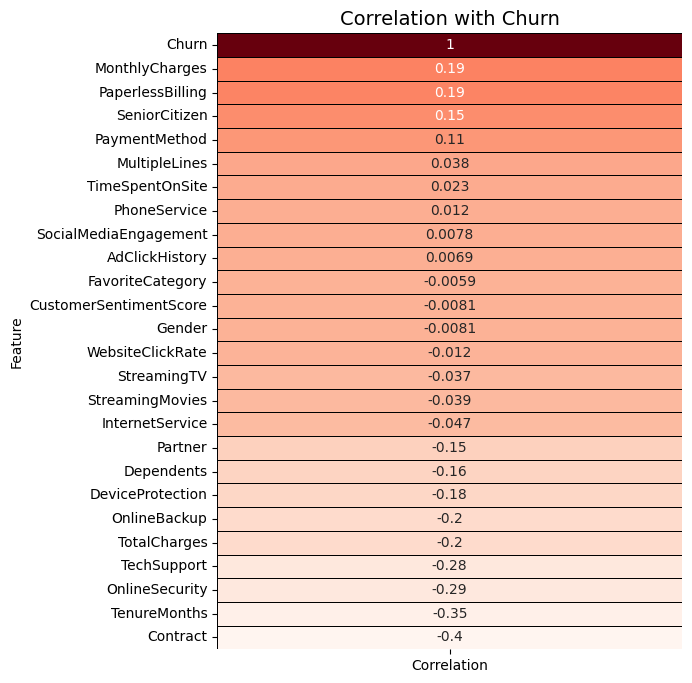

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Extract correlation values with respect to 'Churn'
churn_correlation = correlation_matrix['Churn'].sort_values(ascending=False)

# Create a DataFrame for the correlations
corr_df = pd.DataFrame(churn_correlation).reset_index()
corr_df.columns = ['Feature', 'Correlation']

# Set the index as the feature names for a vertical bar-like heatmap
corr_df.set_index('Feature', inplace=True)

# Plot the heatmap-like bar visualization
plt.figure(figsize=(6, 8))
sns.heatmap(corr_df, annot=True, cmap='Reds', cbar=False, linewidths=0.5, linecolor='black')
plt.title('Correlation with Churn', fontsize=14)
plt.show()

In [ ]:

# List of features with correlation in (-0.1, 0.1)
features_to_drop = [
    'MultipleLines', 'TimeSpentOnSite', 'PhoneService',
    'SocialMediaEngagement', 'AdClickHistory', 'FavoriteCategory',
    'CustomerSentimentScore', 'Gender', 'WebsiteClickRate'
]

# Drop these features from the DataFrame
df1 = df1.drop(columns=features_to_drop)

# Verify the remaining columns
print("Remaining columns:")
print(df1.columns)


Remaining columns:
Index(['SeniorCitizen', 'Partner', 'Dependents', 'TenureMonths',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7029 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7029 non-null   int64  
 1   Partner           7029 non-null   int64  
 2   Dependents        7029 non-null   int64  
 3   TenureMonths      7029 non-null   float64
 4   InternetService   7029 non-null   int64  
 5   OnlineSecurity    7029 non-null   int64  
 6   OnlineBackup      7029 non-null   int64  
 7   DeviceProtection  7029 non-null   int64  
 8   TechSupport       7029 non-null   int64  
 9   StreamingTV       7029 non-null   int64  
 10  StreamingMovies   7029 non-null   int64  
 11  Contract          7029 non-null   int64  
 12  PaperlessBilling  7029 non-null   int64  
 13  PaymentMethod     7029 non-null   int64  
 14  MonthlyCharges    7029 non-null   float64
 15  TotalCharges      7029 non-null   float64
 16  Churn             7029 non-null   int64  
dtype

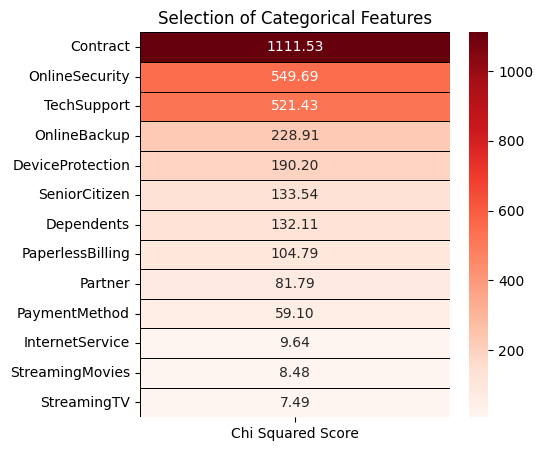

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2


# Define categorical features (excluding the target 'Churn')
categorical_features = [
    'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV',
    'StreamingMovies', 'Contract', 'PaperlessBilling',
    'PaymentMethod'
]

# Define features (X) and target (y)
features = df1.loc[:, categorical_features]
target = df1.loc[:, 'Churn']

# Perform chi-squared analysis
best_features = SelectKBest(score_func=chi2, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame to store chi-squared scores
feature_scores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

# Sort by chi-squared score
feature_scores = feature_scores.sort_values(by='Chi Squared Score', ascending=False)

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(feature_scores, annot=True, cmap='Reds', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Categorical Features')
plt.show()


In [ ]:
features_to_drop = ['InternetService', 'StreamingMovies', 'StreamingTV']
df1 = df1.drop(columns=features_to_drop)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7029 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7029 non-null   int64  
 1   Partner           7029 non-null   int64  
 2   Dependents        7029 non-null   int64  
 3   TenureMonths      7029 non-null   float64
 4   OnlineSecurity    7029 non-null   int64  
 5   OnlineBackup      7029 non-null   int64  
 6   DeviceProtection  7029 non-null   int64  
 7   TechSupport       7029 non-null   int64  
 8   Contract          7029 non-null   int64  
 9   PaperlessBilling  7029 non-null   int64  
 10  PaymentMethod     7029 non-null   int64  
 11  MonthlyCharges    7029 non-null   float64
 12  TotalCharges      7029 non-null   float64
 13  Churn             7029 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 823.7 KB


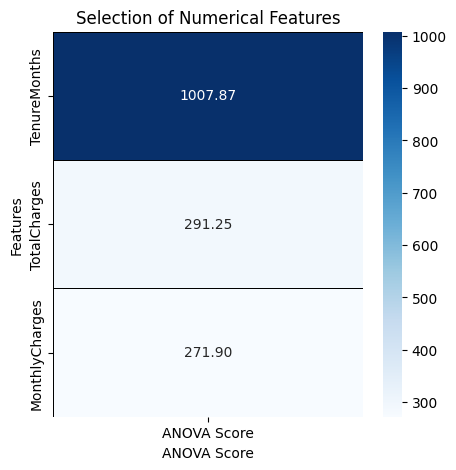

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
# select numerical features from df1 (excluding 'Churn')
numerical_features = df1.select_dtypes(include=['float64']).columns.tolist()

# Define features (X) and target (y)
features = df1.loc[:, numerical_features]
target = df1.loc[:, 'Churn']

# Perform ANOVA feature selection
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(features, target)

# Create a DataFrame for the ANOVA scores
feature_scores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['ANOVA Score'])

# Sort by ANOVA score
feature_scores = feature_scores.sort_values(by='ANOVA Score', ascending=False)

# Visualize using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(feature_scores, annot=True, cmap='Blues', linewidths=0.4, linecolor='black', fmt='.2f')
plt.title('Selection of Numerical Features')
plt.xlabel('ANOVA Score')
plt.ylabel('Features')
plt.show()

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7029 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7029 non-null   int64  
 1   Partner           7029 non-null   int64  
 2   Dependents        7029 non-null   int64  
 3   TenureMonths      7029 non-null   float64
 4   OnlineSecurity    7029 non-null   int64  
 5   OnlineBackup      7029 non-null   int64  
 6   DeviceProtection  7029 non-null   int64  
 7   TechSupport       7029 non-null   int64  
 8   Contract          7029 non-null   int64  
 9   PaperlessBilling  7029 non-null   int64  
 10  PaymentMethod     7029 non-null   int64  
 11  MonthlyCharges    7029 non-null   float64
 12  TotalCharges      7029 non-null   float64
 13  Churn             7029 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 823.7 KB


In [ ]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score

In [ ]:
# Define features and target
X = df1.drop(columns=['Churn'])  # Features
y = df1['Churn']  # Target

# Split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize the Decision Tree Classifier
classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Fit the model on the training data
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Perform cross-validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
cv_score = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()
print("Cross Validation Score:", '{0:.2%}'.format(cv_score))


Cross Validation Score: 82.96%


ROC_AUC Score: 69.26%


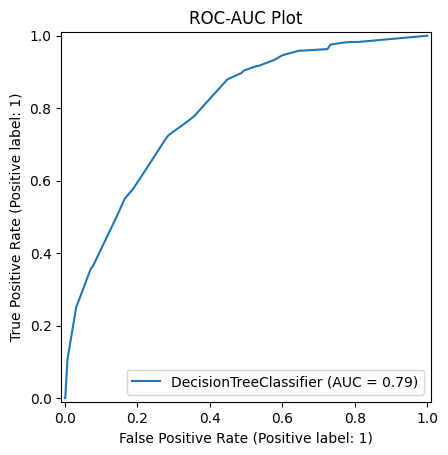

In [ ]:
# Calculate ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC_AUC Score:", '{0:.2%}'.format(roc_auc))

# Plot ROC Curve using RocCurveDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title('ROC-AUC Plot')
plt.show()


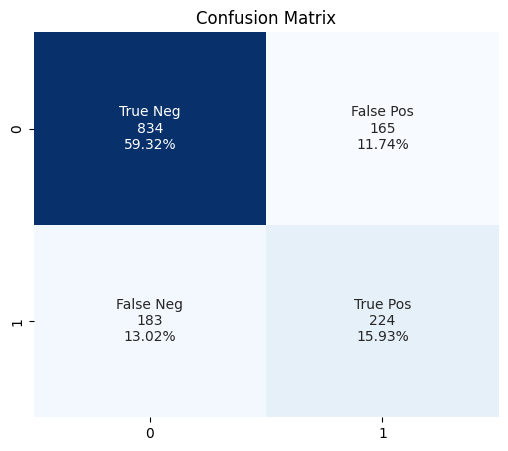

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = [value for value in cm.flatten()]
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
annotations = [f'{label}\n{count}\n{percent}' for label, count, percent in zip(labels, counts, percentages)]
annotations = np.asarray(annotations).reshape(2, 2)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annotations, cmap='Blues', fmt='', cbar=False)
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       999
           1       0.58      0.55      0.56       407

    accuracy                           0.75      1406
   macro avg       0.70      0.69      0.70      1406
weighted avg       0.75      0.75      0.75      1406



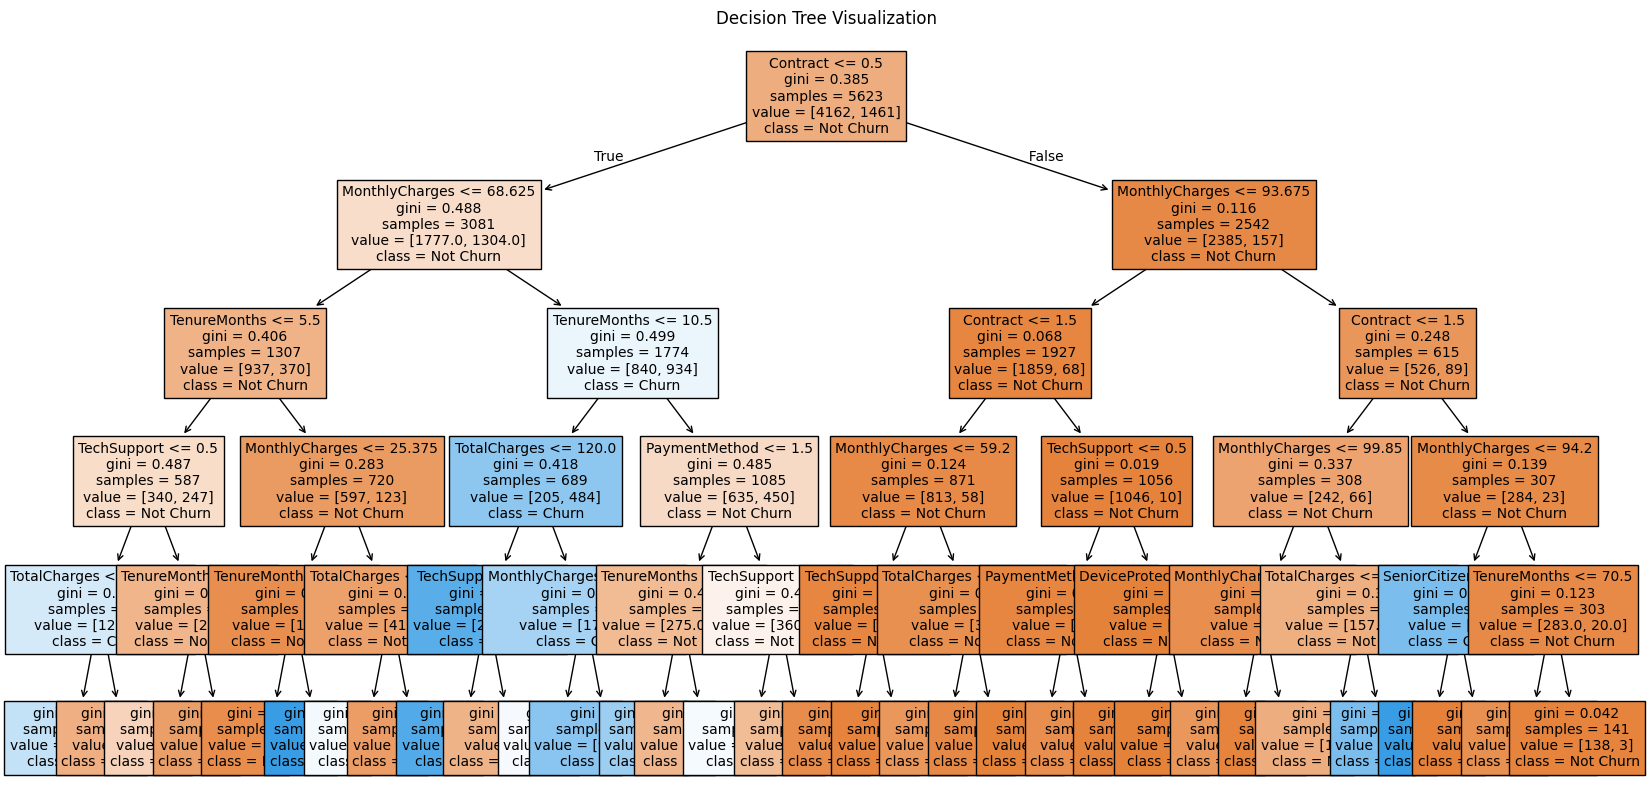

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(classifier, feature_names=X.columns, class_names=['Not Churn', 'Churn'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

# Question 3

In [ ]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns (e.g., 'Churn') for clustering
df_clustering = df1.drop(columns=['Churn'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)



In [ ]:
from sklearn.decomposition import PCA

# Reduce data to 2 dimensions for visualization
pca = PCA(n_components=2)  # Reduce to 2 components
reduced_data = pca.fit_transform(scaled_data)

# Print explained variance ratio to understand how much variance is retained
print("Explained Variance Ratio by PCA components:", pca.explained_variance_ratio_)


Explained Variance Ratio by PCA components: [0.28389793 0.15382044]


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-means with 4 clusters (you can adjust n_clusters if necessary)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(reduced_data)

# Evaluate clustering performance using the Silhouette Score
silhouette_kmeans = silhouette_score(reduced_data, kmeans_labels)
print(f"K-means Silhouette Score: {silhouette_kmeans:.2f}")

# Add K-means cluster labels to the original DataFrame for further analysis
df_clustering['KMeans_Cluster'] = kmeans_labels


K-means Silhouette Score: 0.39


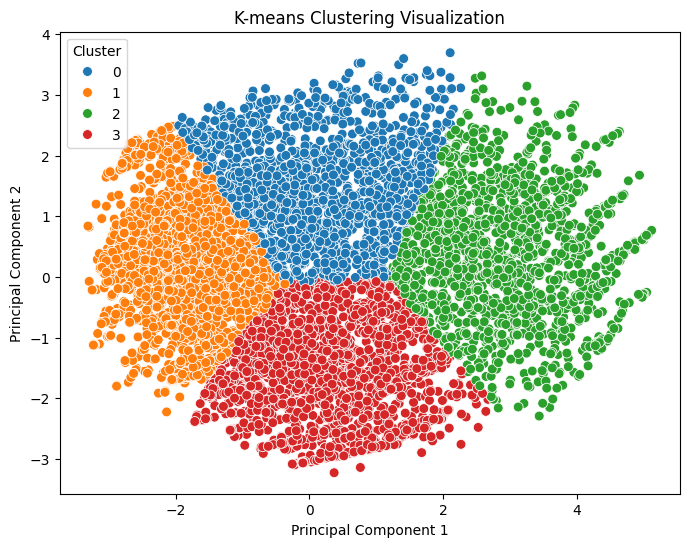

In [ ]:

# Visualize K-means Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=reduced_data[:, 0],
    y=reduced_data[:, 1],
    hue=kmeans_labels,
    palette='tab10',
    s=50
)
plt.title('K-means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


In [ ]:
# Analyze cluster characteristics
cluster_analysis = df_clustering.groupby('KMeans_Cluster').mean()

# Display the results
print("Cluster Analysis (K-means):")
print(cluster_analysis)


Cluster Analysis (K-means):
                SeniorCitizen   Partner  Dependents  TenureMonths  \
KMeans_Cluster                                                      
0                    0.399584  0.495845    0.130886     38.211911   
1                    0.146997  0.194456    0.123058      8.883242   
2                    0.139156  0.788305    0.429312     63.433753   
3                    0.014571  0.620076    0.559093     35.573664   

                OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
KMeans_Cluster                                                                
0                     0.453601      1.056094          1.027008     0.470222   
1                     0.371273      0.411592          0.398992     0.372953   
2                     1.396743      1.546262          1.605477     1.467802   
3                     1.145170      0.957366          0.945494     1.105235   

                Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
KMean

# Question 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import roc_auc_score, classification_report, RocCurveDisplay, confusion_matrix
from xgboost import XGBClassifier

Cross Validation Score: 79.48%
Random Forest Metrics:
Accuracy: 0.7652916073968705
ROC-AUC: 0.6637546637546637
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.85       999
           1       0.64      0.42      0.51       407

    accuracy                           0.77      1406
   macro avg       0.72      0.66      0.68      1406
weighted avg       0.75      0.77      0.75      1406



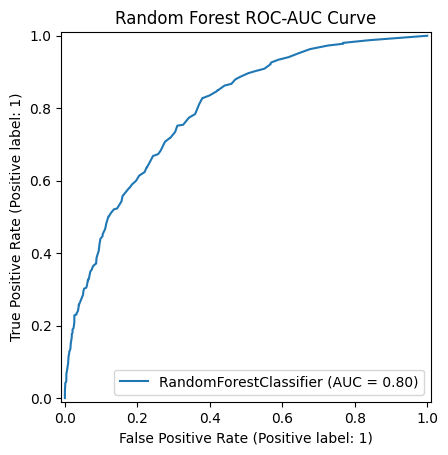

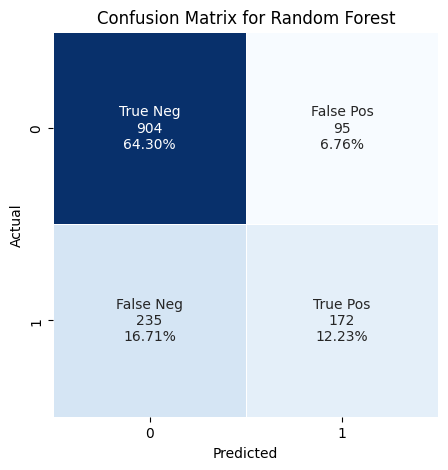

In [ ]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='accuracy')  # Accuracy as the metric
cv_score_mean = np.mean(cv_scores)

print(f"Cross Validation Score: {cv_score_mean:.2%}")

# Train and Evaluate on Test Set
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Metrics:")
print("Accuracy:", rf_model.score(X_test, y_test))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot ROC Curve
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Random Forest ROC-AUC Curve")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Define labels for annotations
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = cm.flatten()
percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
annotations = [f"{label}\n{count}\n{percent}" for label, count, percent in zip(labels, counts, percentages)]
annotations = np.asarray(annotations).reshape(2, 2)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=annotations, cmap='Blues', fmt='', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Cross Validation Score: 80.67%
AdaBoost Metrics:
Accuracy: 0.783072546230441
ROC-AUC: 0.7032032032032032
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       999
           1       0.66      0.51      0.58       407

    accuracy                           0.78      1406
   macro avg       0.74      0.70      0.72      1406
weighted avg       0.77      0.78      0.77      1406



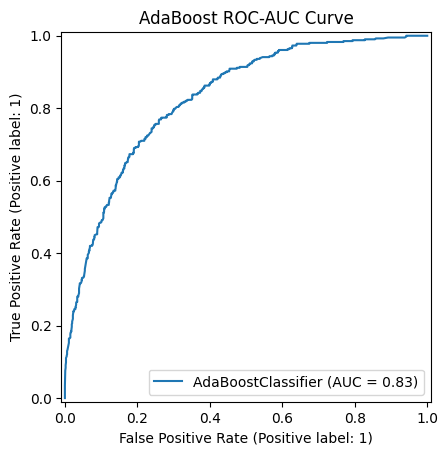

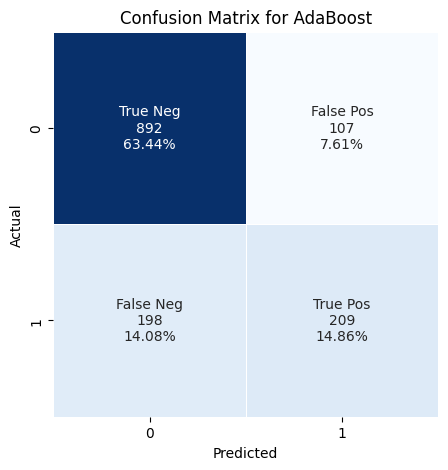

In [ ]:
# Train AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
cv_scores = cross_val_score(ada_model, X_train, y_train, cv=cv, scoring='accuracy')  # Accuracy as the metric
cv_score_mean = np.mean(cv_scores)

print(f"Cross Validation Score: {cv_score_mean:.2%}")

# Train and Evaluate on Test Set
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# Print Metrics
print("AdaBoost Metrics:")
print("Accuracy:", ada_model.score(X_test, y_test))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_ada))
print("Classification Report:\n", classification_report(y_test, y_pred_ada))

# Plot ROC Curve
RocCurveDisplay.from_estimator(ada_model, X_test, y_test)
plt.title("AdaBoost ROC-AUC Curve")
plt.show()

# Confusion Matrix
cm_ada = confusion_matrix(y_test, y_pred_ada)

# Define labels for annotations
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
counts = cm_ada.flatten()
percentages = ['{0:.2%}'.format(value) for value in cm_ada.flatten() / np.sum(cm_ada)]
annotations = [f"{label}\n{count}\n{percent}" for label, count, percent in zip(labels, counts, percentages)]
annotations = np.asarray(annotations).reshape(2, 2)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=annotations, cmap='Blues', fmt='', cbar=False, square=True, linewidths=0.5)
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Cross Validation Accuracy: 78.67%
Cross Validation ROC-AUC: 82.62%

XGBoost Metrics:
Test Accuracy: 75.89%
Test ROC-AUC: 80.09%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       999
           1       0.61      0.46      0.52       407

    accuracy                           0.76      1406
   macro avg       0.71      0.67      0.68      1406
weighted avg       0.75      0.76      0.75      1406



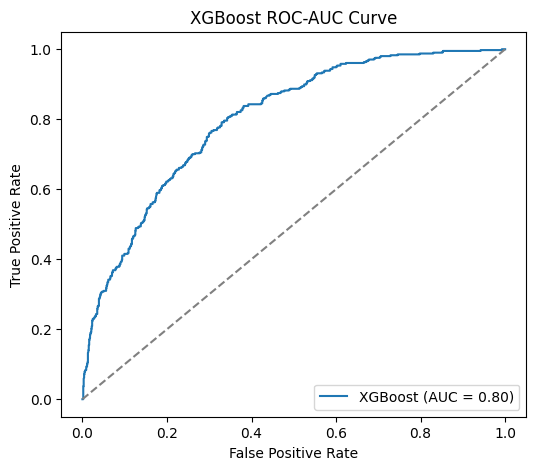

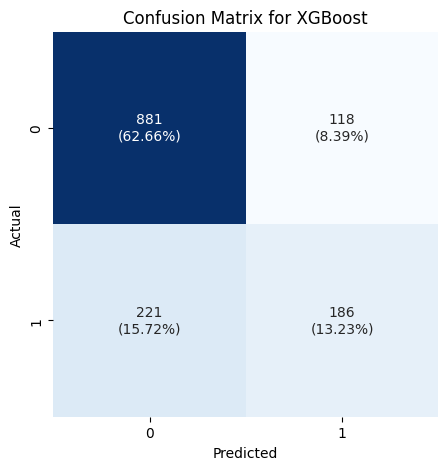

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Cross-Validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)

cv_accuracies = []
cv_roc_aucs = []

# Manual Cross-Validation
for train_idx, test_idx in cv.split(X_train, y_train):
    X_cv_train, X_cv_test = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_cv_train, y_cv_test = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Train the model
    xgb_model.fit(X_cv_train, y_cv_train)

    # Make predictions
    y_cv_pred = xgb_model.predict(X_cv_test)
    y_cv_prob = xgb_model.predict_proba(X_cv_test)[:, 1]  # Get probabilities for positive class

    # Calculate metrics
    cv_accuracies.append(xgb_model.score(X_cv_test, y_cv_test))
    cv_roc_aucs.append(roc_auc_score(y_cv_test, y_cv_prob))

# Mean Cross-Validation Scores
mean_cv_accuracy = np.mean(cv_accuracies)
mean_cv_roc_auc = np.mean(cv_roc_aucs)

print(f"Cross Validation Accuracy: {mean_cv_accuracy:.2%}")
print(f"Cross Validation ROC-AUC: {mean_cv_roc_auc:.2%}")

# Train on full training set and evaluate on the test set
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_pred_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class

# Test Set Metrics
print("\nXGBoost Metrics:")
print(f"Test Accuracy: {xgb_model.score(X_test, y_test):.2%}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, y_pred_prob_xgb):.2%}")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc_score(y_test, y_pred_prob_xgb):.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC-AUC Curve")
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Calculate percentages
cm_percentages = cm_xgb / np.sum(cm_xgb)

# Combine counts and percentages
labels = [
    f"{count}\n({percent:.2%})"
    for count, percent in zip(cm_xgb.flatten(), cm_percentages.flatten())
]
labels = np.asarray(labels).reshape(2, 2)

# Plot Confusion Matrix with Counts and Percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=labels, fmt='', cmap='Blues', cbar=False, square=True)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
